<h1 style="font-size:40px;">INFOSYS_STOCK_MARKET_PRICE_PREDICTION</h1>


<h1 style = "font-size:20px">Importing the required Libraries</h1>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
df = pd.read_csv("C:\\Users\\ckdshjadskkhdsl\\Downloads\\INFY.NS (1).csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-07-2015,494.500000,502.500000,493.000000,498.700012,415.561249,6880852.0
1,02-07-2015,499.500000,500.700012,492.524994,494.000000,411.644745,4007568.0
2,03-07-2015,494.000000,496.500000,491.000000,495.149994,412.603058,2695306.0
3,06-07-2015,492.500000,494.000000,487.500000,491.649994,409.686493,4305602.0
4,07-07-2015,492.500000,495.000000,489.500000,490.250000,408.519897,3497418.0
...,...,...,...,...,...,...,...
1223,23-06-2020,695.700012,724.500000,692.099976,720.650024,720.650024,12157390.0
1224,24-06-2020,716.900024,726.799988,709.400024,714.150024,714.150024,10220838.0
1225,25-06-2020,704.849976,705.599976,693.500000,700.500000,700.500000,14945284.0
1226,26-06-2020,710.200012,751.599976,710.000000,748.200012,748.200012,26030458.0


In [17]:
df.shape

(1228, 7)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1228 non-null   object 
 1   Open       1227 non-null   float64
 2   High       1227 non-null   float64
 3   Low        1227 non-null   float64
 4   Close      1227 non-null   float64
 5   Adj Close  1227 non-null   float64
 6   Volume     1227 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [19]:
# Convert Date to datetime and sort by time (important for time-series)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date').reset_index(drop=True)


In [20]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [21]:
df.isnull().sum().sum()

6

<h1 style = "font-size:20px">Drop rows with missing values</h1>

In [22]:
df = df.dropna().reset_index(drop=True)

In [23]:
# Create Target: next day's Close price
df['Target'] = df['Close'].shift(-1)

# Drop last row (Target is NaN there because no "next day")
df = df.iloc[:-1].reset_index(drop=True)

<h1 style = "font-size:20px">Define features</h1>

In [24]:
feature_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
target_col = 'Target'

X = df[feature_cols]
y = df[target_col]

<h1 style = "font-size:20px">Time-based train-test split (80% train, 20% test)</h1>

In [25]:
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

<h1 style = "font-size:20px">Scaling for linear and distance-based models</h1>

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
print("Train shape:", X_train.shape, " Test shape:", X_test.shape)
print("Features:", feature_cols)
print("Target column:", target_col)

Train shape: (980, 6)  Test shape: (246, 6)
Features: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Target column: Target


In [28]:
print(df[feature_cols + [target_col]].describe())

              Open         High          Low        Close    Adj Close  \
count  1226.000000  1226.000000  1226.000000  1226.000000  1226.000000   
mean    605.253916   611.885952   598.411398   605.058462   557.275190   
std     103.957572   105.104646   103.042124   104.091292   118.288442   
min     440.000000   443.799988   430.000000   436.700012   390.604187   
25%     514.156250   519.656235   509.324990   513.912476   451.256043   
50%     585.512512   592.350006   579.774994   585.837494   517.064239   
75%     704.587479   711.687515   695.812515   704.100021   676.345413   
max     843.299988   847.000000   835.049988   840.150024   810.035217   

             Volume       Target  
count  1.226000e+03  1226.000000  
mean   8.675513e+06   605.248552  
std    7.945023e+06   104.109697  
min    7.589560e+05   436.700012  
25%    5.361066e+06   514.181229  
50%    7.019970e+06   586.075012  
75%    9.556096e+06   704.318756  
max    1.644050e+08   840.150024  


<h1 style = "font-size:25px">Plotting Graph for Analysing Patterns</h1>

<h1 style = "font-size:20px">Plot 1: Close price over time</h1>

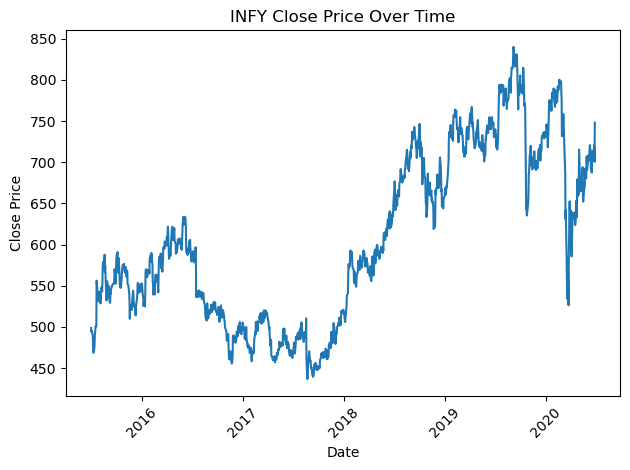

In [29]:
plt.figure()
plt.plot(df['Date'], df['Close'], label='Today Close')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("INFY Close Price Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1 style = "font-size:20px">Plot 2: Target (Next-day Close) over time</h1>

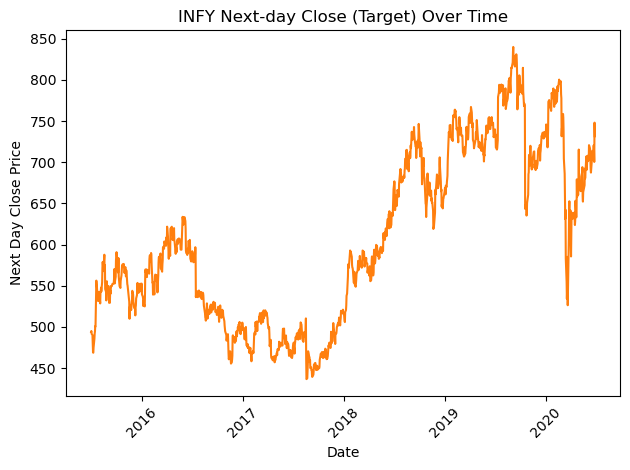

In [30]:
plt.figure()
plt.plot(df['Date'], df['Target'], label='Next Day Close', color='tab:orange')
plt.xlabel("Date")
plt.ylabel("Next Day Close Price")
plt.title("INFY Next-day Close (Target) Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1 style = "font-size:20px">Plot 3: Distribution of Close prices</h1>

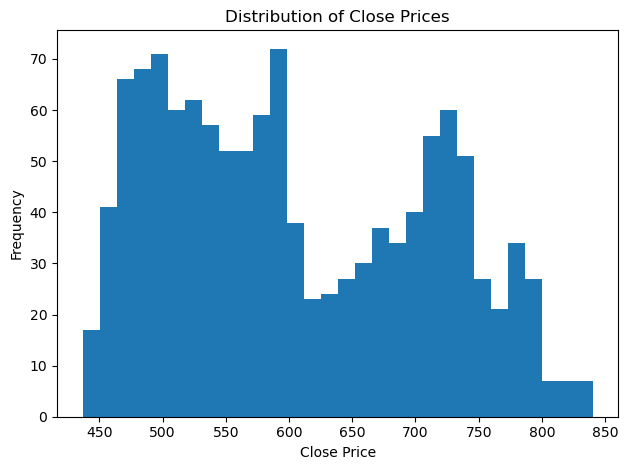

In [31]:
plt.style.use("default")         # Ensures white background everywhere

plt.figure()
plt.hist(df['Close'], bins=30)
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title("Distribution of Close Prices")

plt.tight_layout()
plt.show()


<h1 style = "font-size:25px">Correlation heatmap between features and Target</h1>

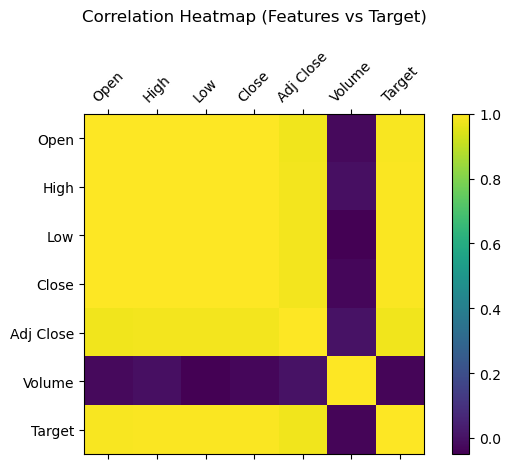

In [32]:
cols_for_corr = feature_cols + [target_col]
corr = df[cols_for_corr].corr()

fig, ax = plt.subplots()
cax = ax.matshow(corr.values)
fig.colorbar(cax)
ax.set_xticks(range(len(cols_for_corr)))
ax.set_yticks(range(len(cols_for_corr)))
ax.set_xticklabels(cols_for_corr, rotation=45)
ax.set_yticklabels(cols_for_corr)
plt.title("Correlation Heatmap (Features vs Target)", pad=20)
plt.tight_layout()
plt.show()

<h1 style = "font-size:20px">EVALUATION FUNCTION - 
 MAE, MSE, RMSE, R²</h1>

In [33]:
def evaluate_regression(model_name, y_true, y_pred, results_dict):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name}")
    print("MAE :", mae)
    print("MSE :", mse)
    print("RMSE:", rmse)
    print("R²  :", r2)

    
    results_dict[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    }

    
    plt.figure()
    plt.plot(range(len(y_true)), y_true.values, label="Actual (Target)")
    plt.plot(range(len(y_pred)), y_pred, label="Predicted")
    plt.xlabel("Test Sample Index")
    plt.ylabel("Next-day Close Price")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

<h1 style = "font-size:20px">IMPLEMENTATION OF LINEAR REGRESSION</h1>


Linear Regression
MAE : 11.309820456783477
MSE : 318.6210544400211
RMSE: 17.849959508077912
R²  : 0.9160294365585021


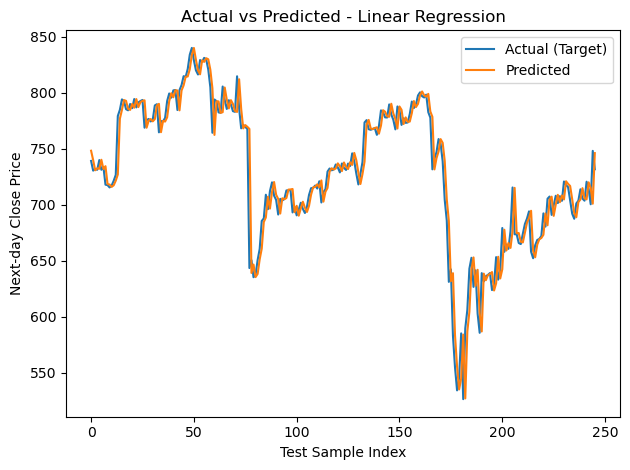

In [34]:
results = {}   

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)

evaluate_regression("Linear Regression", y_test, y_pred_lr, results)

<h1 style = "font-size:20px">IMPLEMENTATION OF K-NEAREST NEIGHBORS REGRESSION</h1>


KNN Regressor
MAE : 23.46430726504064
MSE : 963.5539318544458
RMSE: 31.041165117541027
R²  : 0.7460614562766774


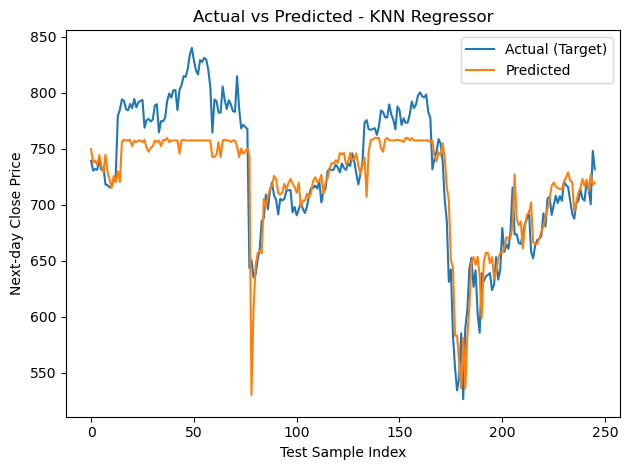

In [35]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)

y_pred_knn = knn_reg.predict(X_test_scaled)

evaluate_regression("KNN Regressor", y_test, y_pred_knn, results)